**Задание 1**


Используя исторические данные на листе «Timeseries» (см. Задания_1_2.xlsx), построить модель временного ряда.  Спрогнозировать  ежедневное поведение ряда в следующие 3 мес.  Пояснить выбор метода прогнозирования. Привести оценки качества прогноза.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

In [13]:
ts = pd.read_excel("Задания_1_2.xlsx", sheet_name = 'Timeseries')

In [14]:
#Изучим данные
ts.head()

,Date,series1
0,2015-01-01,1006.699649
1,2015-01-02,3197.751826
2,2015-01-03,3217.491035
3,2015-01-04,2151.573759
4,2015-01-05,4243.929892


In [15]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1642 non-null   object 
 1   series1  1642 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.8+ KB


In [17]:
#Присвоим индекс полю Дата
ts.index = ts['Date']
#Удалим столбец Даты
ts = ts.drop("Date", axis=1)

<AxesSubplot:title={'center':'Временной ряд'}, xlabel='Date'>

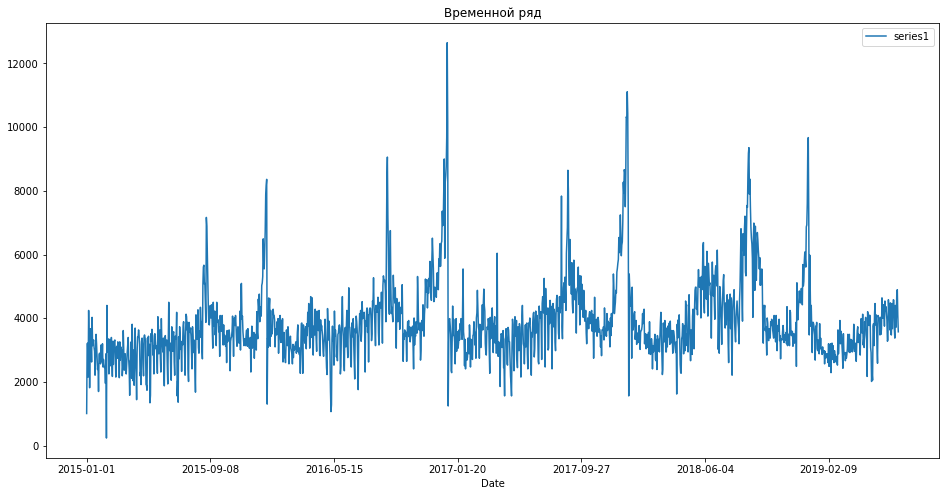

In [23]:
#Визуализируем временной ряд
ts.plot(
    figsize=(16,8),
    title="Временной ряд"
)

По данному графику можно сказать, что тренд и сезонность отсутствуют. Сильновыделяющиеся значения возможно могут быть аномалиями. 

C:\Users\ALINA~1.KOR\AppData\Local\Temp/ipykernel_13232/3646050682.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(ts,freq=12, model="multiplicative").plot()


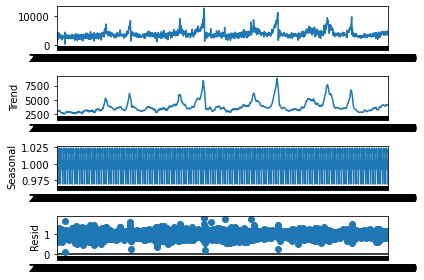

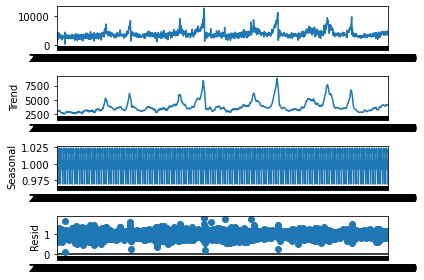

In [26]:
#Сделаем STL декомпозицию временного ряда, для того, чтобы посмотреть, из каких компонент состоит временной ряд. Так же критерием Дики-Фуллера проверим стационарен ли временной ряд
sm.tsa.seasonal_decompose(ts,freq=12, model="multiplicative").plot()
warnings.filterwarnings("ignore")